<figure>
  <IMG SRC="img/logo_ufaz.png" WIDTH=100 ALIGN="right">
</figure>

# Lab 3 : Sampling and aliasing
*Signal Processing in Geosciences / J. Vergne, C. Jordy, Edited by T. Nazarbayov / Sep 2020* 

---------

During this lab we see the influence of the time step (or its inverse : **the sampling rate**) used to acquire a timeseries and we introduce the *Nyquist frequency*

In [1]:
import numpy as np
from numpy import pi
from numpy import fft

from scipy.io import wavfile

import matplotlib.pyplot as plt

## 1. Sampling a $cos$ function

We start with a very simple analytic signal :

$$y(t)=cos(2.\pi.f_0.t)$$

Where $f_0$ is the frequency of the cosinus.

We set $f_0 = 5Hz$

----
>To do :
* Define a time step $dt=0.005s$ (equivalent to a sampling rate $f_s=200Hz$)
* Create the $y$ datasets for time varying between $0$ and $5s$
* Plot the timeseries adding markers (for example a `*`) at eache sample
* Plot the amplitude spectrum (with positive and negative frequencies) and check that it's fits with the theoretical spectrum of the $cos$ function

Text(0.5, 0, 'frequency (Hz)')

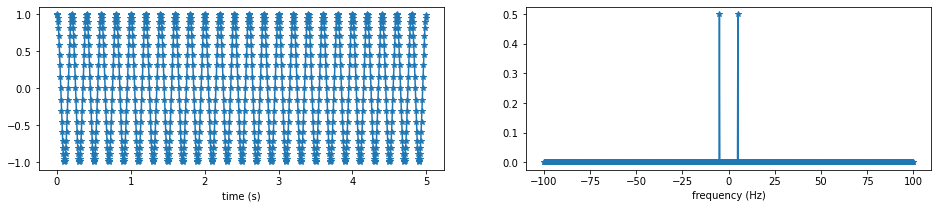

In [19]:
fs = 200
dt = 1/fs

f0 = 5
tmax = 5
tmin = 0
N = int(tmax/dt)

t = np.arange(0, N) * dt
y = np.cos(2*np.pi*f0*t)

plt.figure(figsize=(16, 3))

plt.subplot(121)
plt.xlabel("time (s)")
plt.plot(t, y, marker="*")

Y = fft.fft(y)
f = fft.fftfreq(N, dt)

plt.subplot(122)
plt.plot(f, np.abs(Y)/N, "*-")
plt.xlabel("frequency (Hz)")
#plt.plot(f[0:int(N/2)],np.abs(Y)[0:int(N/2)],'*-') # to draw only positive spectrum
#plt.stem(f,np.abs(Y)/N) # to have a vertical lines at each x location from the baseline to y

Why we use np.arange instead of np.linspace ?

- linspace enables you to control the precise end value
- arange gives you more direct control over the increments between values in the sequence.

with sampling frequency, we want to increment with a regular timestep and thus have direct control over the increments.

>To do : 
* plot again the **same** $cos$ function but decreasing progressively the sampling rate to $100Hz$,$20Hz$,$12Hz$,$5Hz$,$4Hz$
* Until which time step / samplig rate, does the spectrum correspond to the one of the original signal ?

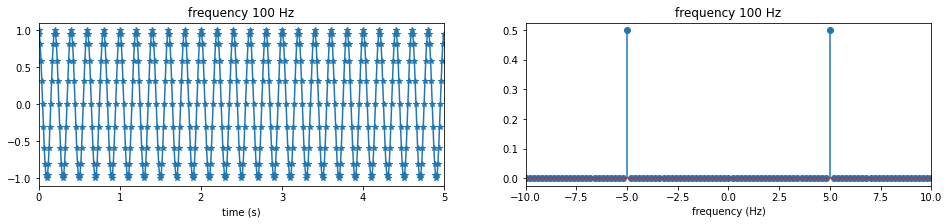

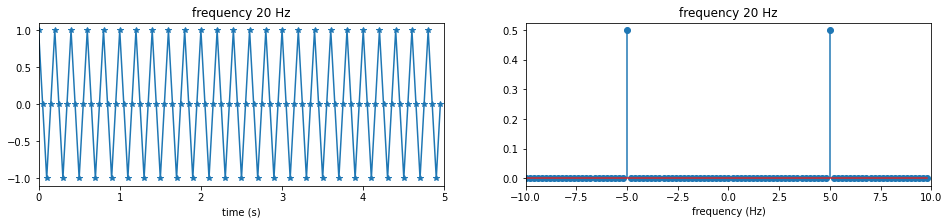

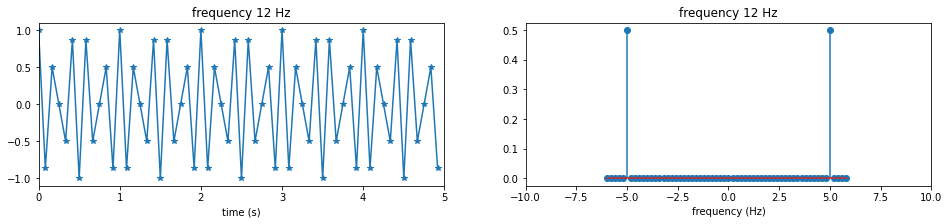

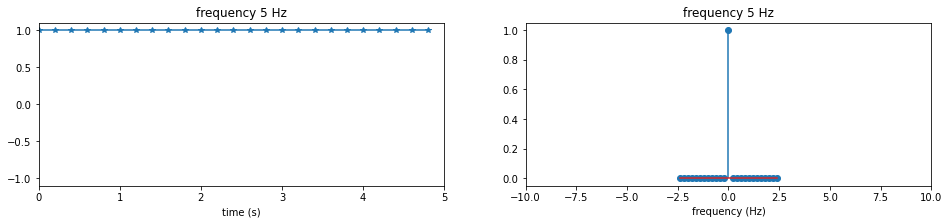

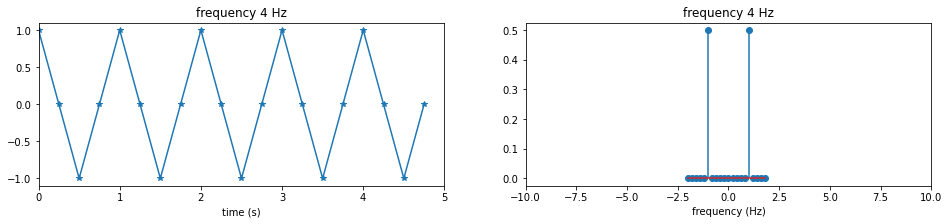

In [20]:
list_fs = [100, 20, 12, 5, 4]

for fs in list_fs:
    dt = 1/fs
    f0 = 5
    tmax = 5
    tmin = 0
    N = int(tmax/dt)

    t = np.arange(0, N) * dt
    y = np.cos(2*np.pi*f0*t)

    plt.figure(figsize=(16, 3))

    plt.subplot(121)
    plt.xlabel("time (s)")
    plt.title(f"frequency {fs} Hz")
    plt.plot(t, y, marker="*")
    plt.xlim((0,5))
    plt.ylim((-1.1,1.1))

    Y = fft.fft(y)
    f = fft.fftfreq(N, dt)

    plt.subplot(122)
    plt.xlabel("frequency (Hz)")
    plt.title(f"frequency {fs} Hz")
    plt.stem(f,np.abs(Y)/N)
    plt.xlim((-10,10))

You should observe that you still get your desired analytic signal (a $cos$ with a $f_0=5Hz$ frequency) until the sampling rate falls below $10Hz$, which is twice $f_0$

-----

**Nyquist criteria / theorem** :

***To properly sample a signal, you need to have a sampling rate ($f_{sampling}$) which is at least twice the maximum frequency of the signal ($f_{max}$) you want to sample***

Mathematically :

$$f_{sampling} > 2.f_{max} $$

or

$$dt<\frac{1}{2.f_{max}} $$

Where $dt$ is the time step


In the previous example the Nyquist frequency is $f_{Nyquist} = 2*f_{max} = 2*5 = 10 Hz$

The fact that the sampling of a $5Hz$ cosinus function with $f_{sampling}=5Hz$ gives a constant function or a $1Hz$ cosinus for $f_{sampling}=4Hz$ is an **aliaising effect** (or *spectral folding* ) which appears when the Nyquist criteria is broken.

In the next example we'll see a practical application

## 2 Downsampling a music file

In this example we'll build a very simple music compressing system.

The idea is just to reduce the sampling rate.
This operation is called a downsampling. 

Indeed in the standard *wav* format music is recorded at a very high rate (usually $44.1kHz$) implying very large files


As an example we will use the music file `frere_jacques.wav`.
It contains the first 8 notes of a traditionnal french song played with a synthetiser (no harmonics).

>To do :
* with `wavfile.read` read the `frere_jacques.wav` file
* Print the sampling rate
* Plot the timeseries in the time domain 
* Compute the fourier transform and plot the amplitude spectrum
* Zoom in the $[500-1000 Hz]$ range
* Find the notes in this music sample ! (based on this table : https://pages.mtu.edu/~suits/notefreqs.html)
* Give an estimate of $f_{max}$

In [21]:
rate, data = wavfile.read("Data/frere_jacques.wav")
dt = 1/rate
N = len(data)
time = np.arange(0, N) * dt

print(rate)
print(np.shape(data))

44100
(340000,)


Text(0.5, 1.0, 'music')

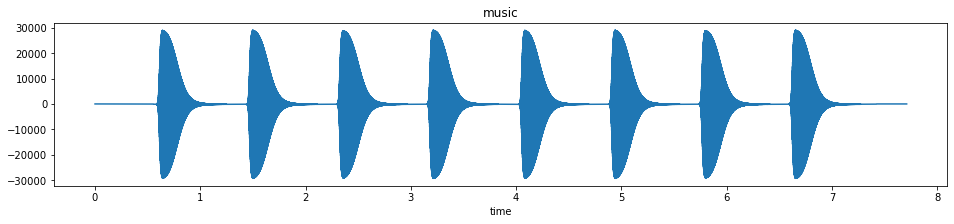

In [22]:
plt.figure(figsize=(16, 3))
plt.plot(time,data)
plt.xlabel("time")
plt.title("music")

Text(0.5, 1.0, 'amp_data_fft')

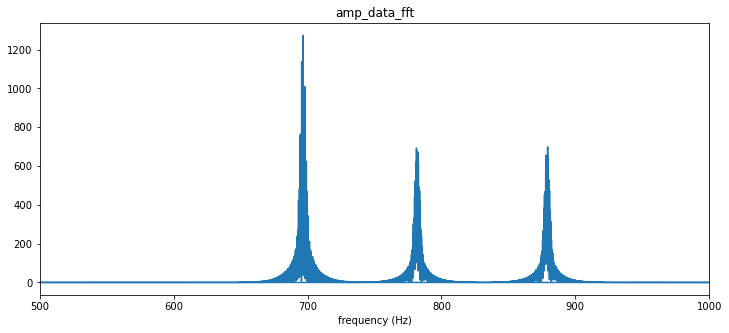

In [24]:
DATA = fft.fft(data)
f = fft.fftfreq(N, dt)
plt.figure(figsize=(12, 5))
plt.plot(f, np.abs(DATA)/N)
plt.xlim(500, 1000)
plt.xlabel('frequency (Hz)')
plt.title("amp_data_fft")

The notes are: F (698Hz), G (784Hz), A (880Hz)

The maximum frequency is around 900Hz

Now we do a basic decimation of the signal in the time domain by a factor of $m$.

This means that we keep only one sample every $m$ of the original signal.
therefore, the time step is multiply by $m$ (and the sampling rate is divided by $m$).

>To do : 
* Decimate the original timeseries by a factor $m=20$
* Compute the corresponding amplitude spectrum and compare it to the initial one
* Use the `wavefile.write`to save the decimated timeseries to a new *wav* file and play it. Comment on our perpection 
* Do the same procedure but with a decimation factor $m=30$

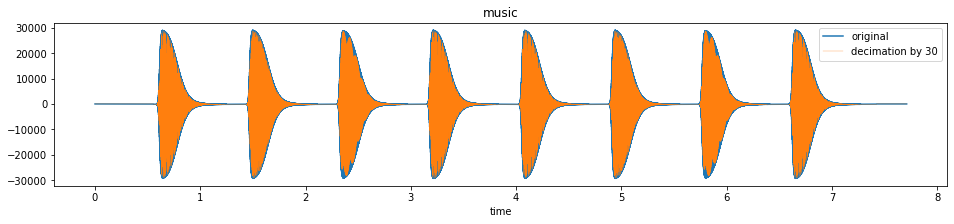

In [26]:
fact_decim = 30

dt_decim = dt * fact_decim
fs_decim = 1./dt_decim

time_decim = time[0::fact_decim]
data_decim = data[0::fact_decim]
N_decim = len(time_decim)

plt.figure(figsize=(16, 3))
plt.plot(time,data, label = "original", linewidth=0.3)
plt.plot(time_decim,data_decim, label = f"decimation by {fact_decim}", linewidth=0.3)
plt.xlabel("time (s)")
plt.title("music")
plt.legend()

Text(0.5, 1.0, 'amp_data_fft')

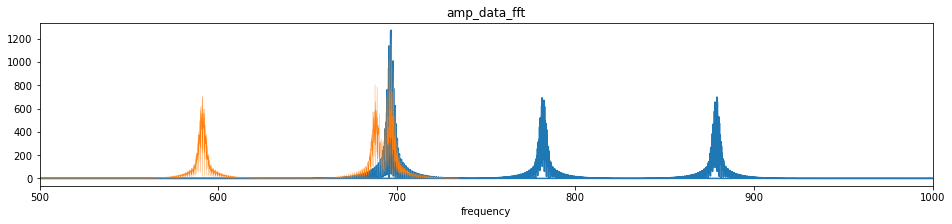

In [27]:
DATA_DECIM = fft.fft(data_decim)
f_decim = fft.fftfreq(N_decim, dt_decim)

plt.figure(figsize=(16, 3))
plt.plot(f, np.abs(DATA)/N, label = "original", linewidth=0.3)
plt.plot(f_decim, np.abs(DATA_DECIM)/N_decim, label = f"decimation by {fact_decim}", linewidth=0.3)
plt.xlabel("frequency (Hz)")
plt.xlim(500, 1000)
plt.title("amp_data_fft")
plt.legend()

In [30]:
rate_decim = int(1./dt_decim)
wavfile.write("Data/frere_jacques_decim.wav",rate_decim, data_decim)

### Anti-alias filtering

**A brutal decimation may therefore introduce new frequencies (notes) in a signal.**

To avoid this phenomenon, the strategy is to remove, before decimation, the frequencies which are higher than twice the new sampling rate (after decimation) $f_{sampling}^{new}$.

This is call *applying an anti-alias filter*.

The basic procedure is :

1. Design a (very simple) anti-aliaising filter which is just a window function (in the frequency domain !) :
$$ h(f) = 1 \ if \ \frac{-f_{sampling}^{new}}{2} < f < \frac{f_{sampling}^{new}}{2} \ and \ 0 \ elsewhere$$
2. Multiply in the frequency domain the Fourier transform of the original data with the filter
3. Go back to the time domain with an inverse Fourier transform
4. Do the decimation in the time domain to get a new dataset with the new sampling rate $f_{sampling}^{new}$

*NB : This simple filter, a window in the frequency domain, is far from ideal because it will introduce a lot of unwanted oscillation in the time domain (similar to the Gibbs effect). Designing adequate anti-aliasing filters is a major point in electronics and signal processing*

The anti-aliasing filter is a window function define in the frequency domain so a function that is equal to 1 between two frequencies and zero else where

Text(0.5, 0, 'frequency (Hz)')

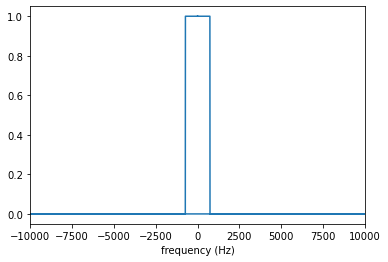

In [32]:
filter = np.zeros(len(f))

for i in range(len(f)):
    if -rate_decim/2 < f[i] < rate_decim/2:
        filter[i] = 1

# Another way to design the anti-aliasing filter
#filter = np.zeros(N)
#i1 = np.all([f>-rate_decim/2,f<rate_decim/2],axis=0)
#filter[i1] = 1.

plt.plot(f, filter)
plt.xlim((-1e4,1e4))
plt.xlabel("frequency (Hz)")

In [33]:
DATA_filter = DATA * filter
data_filter = np.real(fft.ifft(DATA_filter))

Then, and only then, we decimate this new pre-filtered signal use the same parameters (fact_decim and dt_decim) for decimation as for previous 

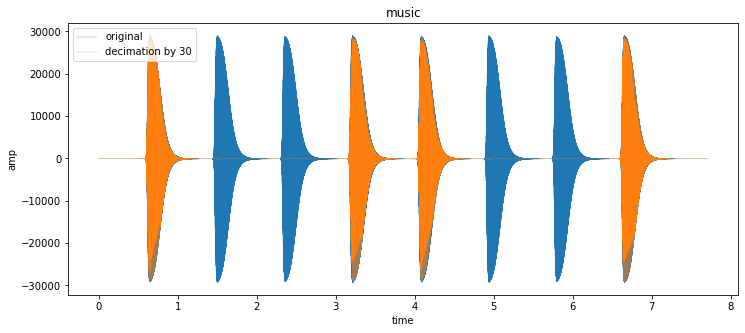

In [35]:
dt_filter_decim = dt * fact_decim
fs_filter_decim = 1./dt_filter_decim

time_filter_decim = time[0::fact_decim]
data_filter_decim = data_filter[0::fact_decim]
N_filter_decim = len(data_filter_decim)

plt.figure(figsize=(12, 5))
plt.plot(time,data, label = "original", linewidth=0.3)
plt.plot(time_filter_decim,data_filter_decim, label = f"decimation by {fact_decim}", linewidth=0.3)
plt.xlabel("time")
plt.ylabel("amp")
plt.title("music")
plt.legend()

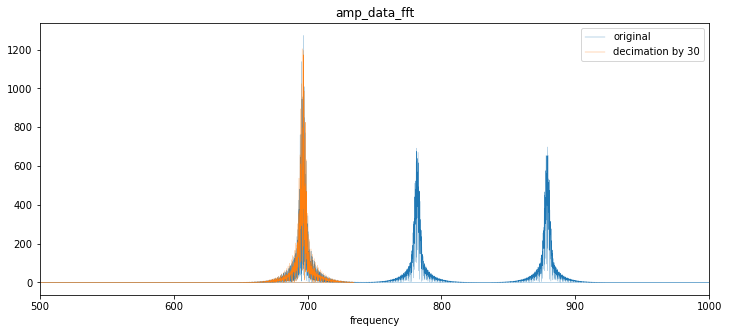

In [38]:
DATA_filter_decim = fft.fft(data_filter_decim)
f_filter_decim = fft.fftfreq(N_filter_decim, dt_filter_decim)

plt.figure(figsize=(12, 5))
plt.plot(f, np.abs(DATA)/N, label = "original", linewidth=0.3)
plt.plot(f_filter_decim, np.abs(DATA_filter_decim)/N_filter_decim, label = f"decimation by {fact_decim}", linewidth=0.3)
plt.xlabel("frequency")
plt.xlim(500, 1000)
plt.title("amp_data_fft")
plt.legend()

We see that we removed some frequencies (notes) from the original data, naming all the ones with a frequency higher than $f_{sampling}^{new}$.

Therefore the decimated signal is off course different from the original one...
However we did not introduce new frequencies (notes) that were not in the original data.

To listen to this decimated signal, we can save it in a *wav* format and use a music player.

In [39]:
rate_decim = int(1./dt_decim)
wavfile.write("Data/frere_jacques_filter_decim.wav",rate_decim,data_filter_decim)

## 3 Decimation of the gravity data

>To do :
* Load again the dataseries `gravi.dat`, plot its amplitude spectrum and zoom in the frequency band $0-0.1 h^{-1}$
* Undersample this dataseries by a factor 10 (new *time step* is therefore $10h$) *- without applying any anti-alais filter -*
* Show that this new dataseries contains frequencies that were not present in the original one.
* Design the correct anti-alias filter and apply it before undersampoling the original signal

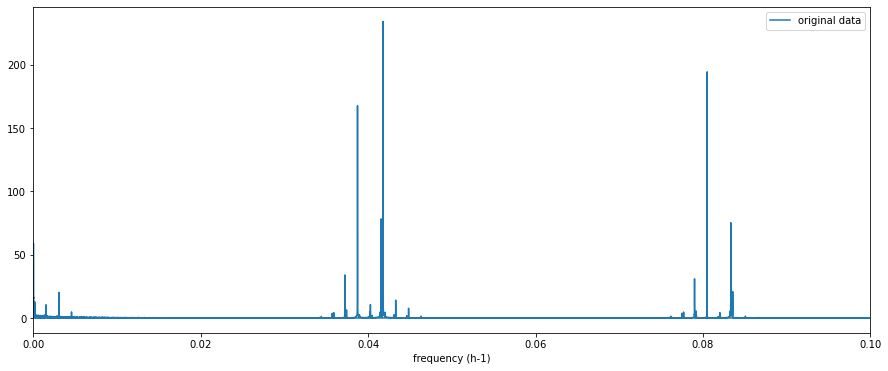

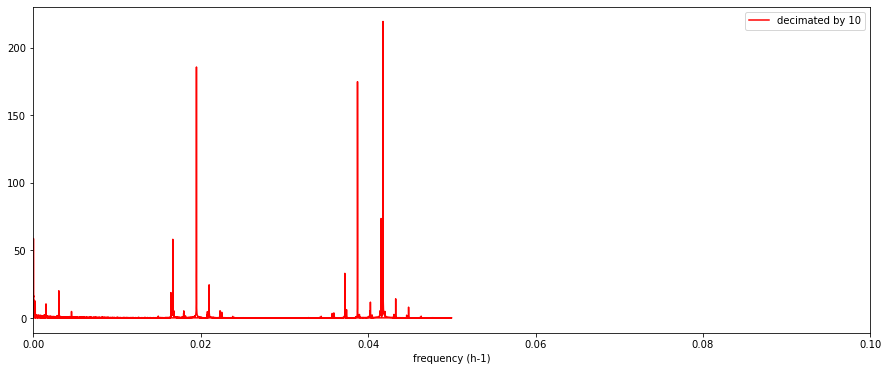

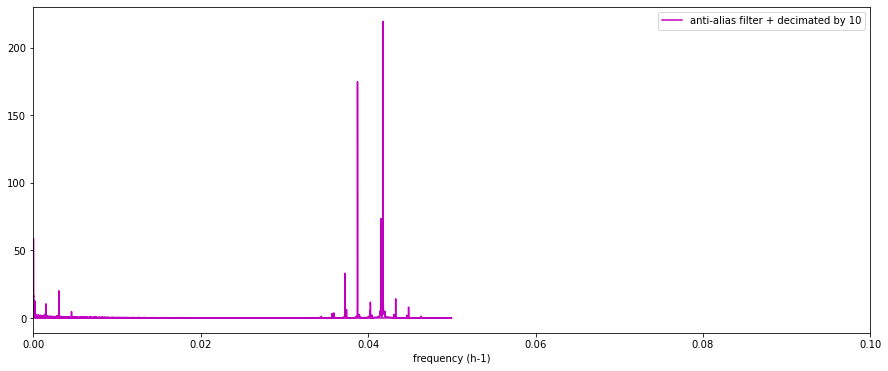

In [4]:
gravi = np.loadtxt('Data/gravi.dat')
dt = 1
N = len(gravi)

gravi = gravi - np.mean(gravi)
GRAVI = fft.fft(gravi)
f = fft.fftfreq(N,dt)

plt.figure(figsize=(15,6))
plt.plot(f,np.abs(GRAVI)/N,label='original data')
plt.xlim(0,.1)
plt.xlabel('frequency (h-1)')
plt.legend()

# Brutal decimation (no anti-alias filter)
fact_decim = 10

gravi_decim = gravi[0::fact_decim]
dt_decim = dt * fact_decim
N_decim = len(gravi_decim)
gravi_decim = gravi_decim - np.mean(gravi_decim)

GRAVI_DECIM = fft.fft(gravi_decim)
f_decim = fft.fftfreq(N_decim,dt_decim)

plt.figure(figsize=(15,6))
plt.plot(f_decim,np.abs(GRAVI_DECIM)/N_decim,label=f"decimated by {fact_decim}", color="r")
plt.xlim(0,.1)
plt.xlabel('frequency (h-1)')
plt.legend()

# Anti-alias filter (defined in frequency domain) before decimation
"""
MY_FILTER = np.zeros(N) 
i1 = np.all([f>-1/(2*dt_decim),f<1/(2*dt_decim)],axis=0)
MY_FILTER[i1] = 1.
"""
filter = np.zeros(len(f))

for i in range(len(f)):
    if -1/(2*dt_decim) < f[i] < 1/(2*dt_decim):
        filter[i] = 1
# Apply the anti-alias filter
GRAVI_FILTER = GRAVI * filter
# Go back to time domain with an inverse Fourier transform (keeping only the real value du to numerical instalbilities)
gravi_filter = np.real(fft.ifft(GRAVI_FILTER))
# Now decimate 
gravi_filter_decim = gravi_filter[0::fact_decim]
dt_decim = dt * fact_decim
N_decim = len(gravi_decim)
gravi_filter_decim = gravi_filter_decim - np.mean(gravi_filter_decim)

GRAVI_FILTER_DECIM = fft.fft(gravi_filter_decim)
f_decim = fft.fftfreq(N_decim,dt_decim)

plt.figure(figsize=(15,6))
plt.plot(f_decim,np.abs(GRAVI_FILTER_DECIM)/N_decim,label=f"anti-alias filter + decimated by {fact_decim}", color="m")
plt.xlim(0,.1)
plt.xlabel('frequency (h-1)')
plt.legend()